<div class="alert alert-block alert-info"> 
<h1 align="center">SAE - Transmission</h1>
<h3 align="center">RT1-FA</h3>
<p align="center">SAE103</p>

Nom :
- Lucas **AUBRIET**
- Théo **HUGUET**

<h3 align="center">JOUR 1 - MARDI</h3>

**1.** Ecrire un programme pour la création d’un signal sinusoïdal avec NumPy (vous choisirez une fréquence entre 1 et 10 kHz) et l’émission de ce signal sur la carte son avec la librairie Sounddevice. Vous choisirez de plus le temps d’émission sachant qu’il faudra recevoir et visualiser ce signal sur le PC récepteur

In [1]:
# Importation des modules nécessaires
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Définition de la fréquence d'échantillonnage
frequence_ech = 100000

# Calcul de la période d'échantillonnage
periode_ech = 1/frequence_ech

# Durée de l'enregistrement
duration = 2

# Liste pour stocker les réponses en fréquence
rep_fr = []

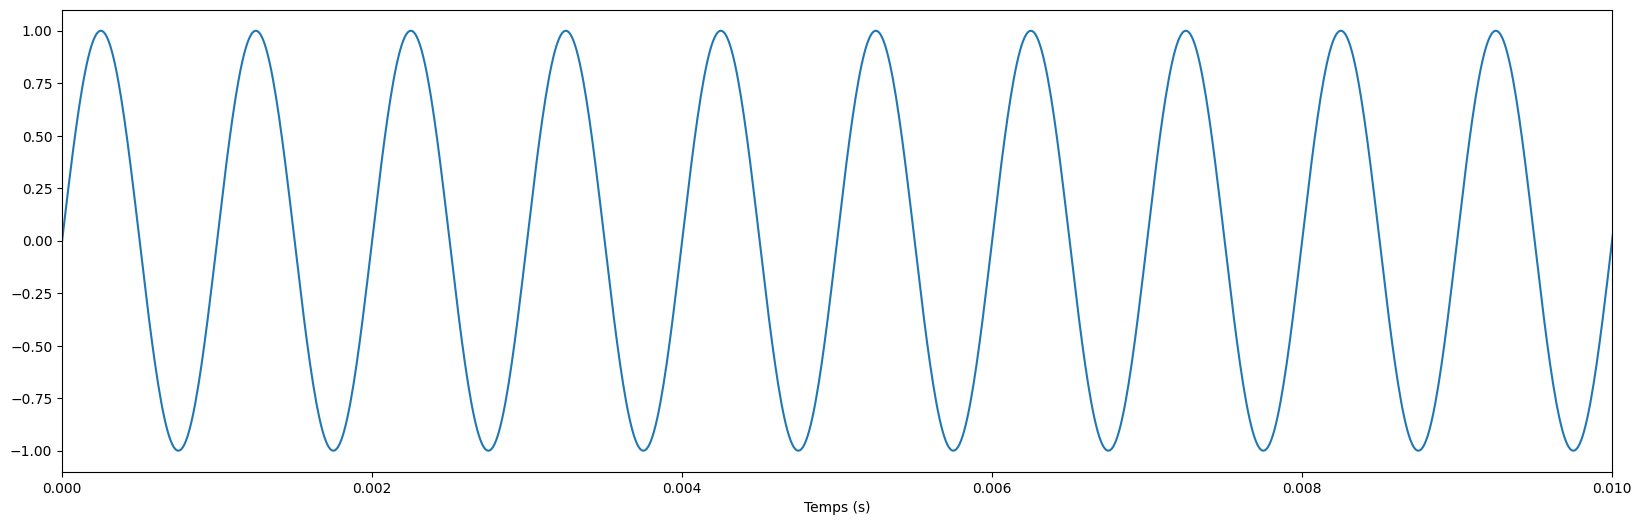

L'aplitude est de : 2.0


In [2]:
def dessin(fin=3, frequence=1000, precision=0.01):
    periode_ech = 1/100000
    print
    temps = np.arange(0, fin, periode_ech)

    # Vecteur de phase
    omega = 2 * np.pi * 1000  

    # Création du vecteur cosinus
    cosinus = np.sin(omega * temps)

    fig, ax = plt.subplots(figsize=(20, 6))

    # Affichage du cosinus
    ax.plot(temps, cosinus)
    ax.set_xlim(0, precision)
    ax.set_xlabel('Temps (s)')
    plt.show()

    amplitude_emi = np.max(cosinus)*2 # Calcul de l'amplitude du signal émis
    print("L'aplitude est de :", amplitude_emi)

dessin()

In [ ]:
sd.play(cosinus, samplerate=frequence_ech)
sd.wait()

<h3>Savoir ce qu'est la réponse en fréquence :</h3>

**2**. Ecrire un programme pour la réception (avec la librairie Sounddevice) et la visualisation (avec la librairie
Matplotlib) du signal sinusoïdal sur le PC récepteur. Vous choisirez la durée de visualisation.

Text(0.5, 0, 'Temps (s)')

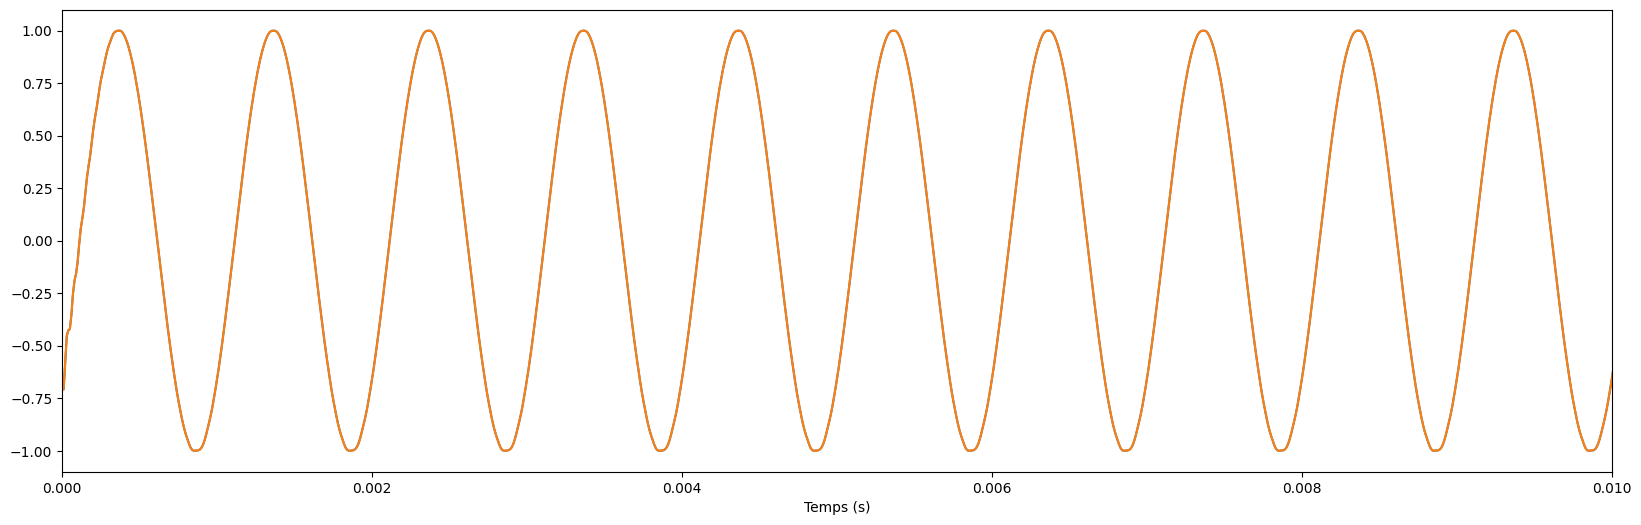

In [4]:
# Durée de l'enregistrement
duration = 2

# Enregistrement du signal avec la carte son
enregistrement = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

# Création du vecteur temps pour l'affichage
t_enr = np.arange(0, duration, periode_ech)

# Création de la figure et des axes pour l'affichage
fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du signal enregistré
ax.plot(t_enr, enregistrement)
ax.set_xlim(0,0.01)
ax.set_xlabel('Temps (s)')


**4.** Algorithme de détéction de fréquence

In [5]:
def calc_frequence(enregistrement):
    count = 0
    for idex in range(len(enregistrement)-1):
        if (enregistrement[idex][1] < 0) and (enregistrement[idex+1][1] > 0):
            count += 1
    return count/duration

calc_frequence(enregistrement)

999.0

**6.** Tester l'algorithme

**7.** Choisir une technique pour déterminer l'amplitude de la sinusoide reçue et l'implémenter dans votre programme

In [ ]:
def amplitude(enregistrement):
    max = 0
    for idex in range(len(enregistrement)):
        if enregistrement[idex][1] > max :
            max = enregistrement[idex][1]
    return float(max*2)



**8.** Tester la mesure d’amplitude.

In [ ]:
amplitude(enregistrement)

**9.** Trouver sur Internet la plage de fréquences des signaux audio et choisir une dizaine de valeurs de fréquences pour effectuer la mesure de la réponse en fréquence des cartes son.

La plage de fréquence audible par l'humain va de <strong>20 à 20000 Hz.</strong>

**10.** Effectuer manuellement la mesure de la réponse en fréquence des cartes son à l’aide de vos programmes sur le PC émetteur et récepteur.

In [9]:
def rep_freq(amplitude_r, amplitude_e):
    return amplitude_r/amplitude_e # Calcul de la fréquence du gain

| Fréquence envoyée  | Fréquence reçue          | Réponse en fréquence |
| :--------------- |:---------------:| -----:|
| 20  |   17.0        |  0.203277587890625 |
| 2000  | 1999.5             |   0.999969482421875  |
| 4000  | 3999.0          |    0.999969482421875 |
| 6000  |   5999.5        |  0.999969482421875  |
| 8000  | 7999.0             |   0.999969482421875 |
| 10000  | 9999.5          |    0.999969482421875 |
| 12000  |   11999.5        |  0.999969482421875  |
| 14000  | 14001.0             |   0.9661865234375 |
| 18000  | 18001.5          |    0.87225341796875 |
| 20000  | 20001.0          |    0.59881591796875 |

<h3>Voici les resultats des envois et des recuperation</h3>
<p> - PC EMMETEUR : MBP - THEO HUGUET</p>
<p> - PC RECEPTEUR : PC - LUCAS AUBRIET </p>

**CODE D'ENVOIE :**

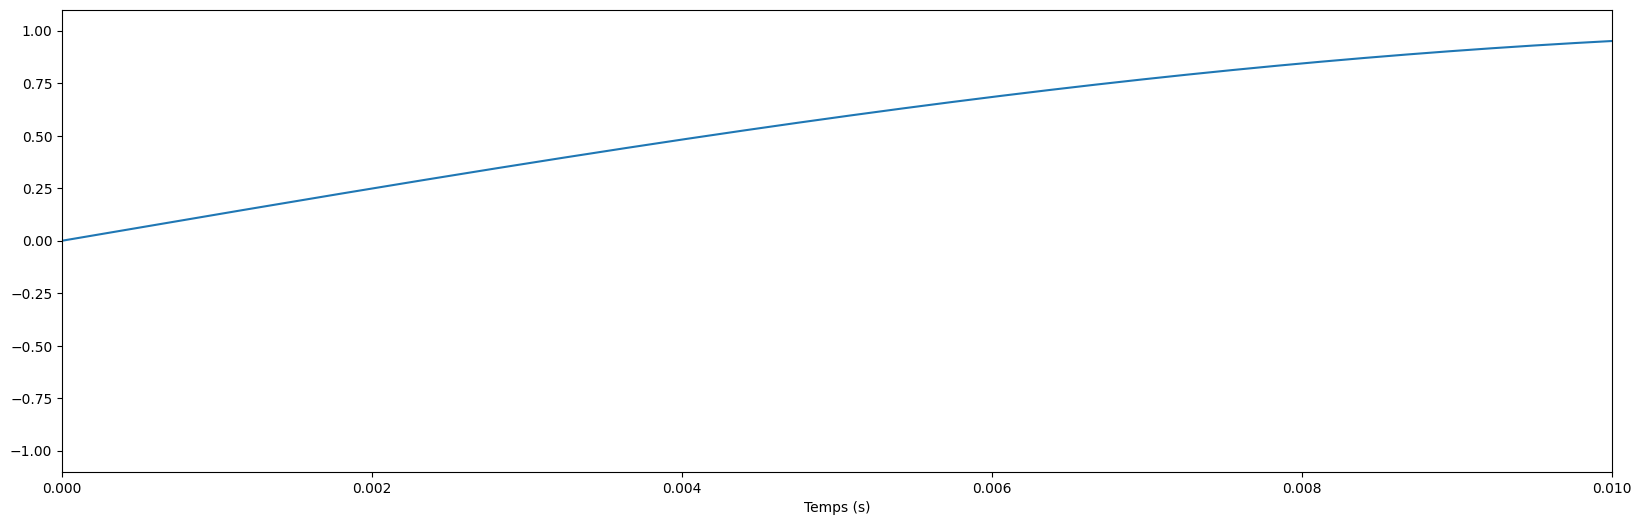

La fréquence envoyée est : 20
L'amplitude émise est :  2.0


In [38]:
# Définition des variables
frq_ech = 1/100000
frq = 20

# Définition de la fonction pour générer une fréquence
def frequency(frq, debut=0, fin=10, precision=0.01):
    # Création du vecteur temps
    temps = np.arange(debut, fin, frq_ech)
    
    # Calcul de l'angle en radian
    omega = 2 * np.pi * frq
    
    # Création du signal sinusoïdal
    cosinus = np.sin(omega * temps)

    # Création de la figure et des axes pour l'affichage
    fig, ax = plt.subplots(figsize=(20, 6))

    # Affichage du signal sinusoïdal
    ax.plot(temps, cosinus)
    ax.set_xlim(0,precision)
    ax.set_xlabel('Temps (s)')
    plt.show()

    # Lecture du signal avec la carte son
    sd.play(cosinus, samplerate=100000)
    sd.wait()
    
    # Affichage de la fréquence envoyée et de l'amplitude émise
    print("La fréquence envoyée est :", frq)
    print("L'amplitude émise est : ", np.max(cosinus)*2)

# Appel de la fonction pour générer une fréquence
frequency(frq)


**CODE DE RECEPTION :**

In [ ]:
# Crée une liste vide pour stocker les réponses en fréquence
rep_fr = []
# Crée une liste vide pour stocker les fréquences reçues
frequencies_r = []

La fréquence reçue est :  17.5
La réponse en fréquence :  0.203277587890625
[0.203277587890625]
[17.5]


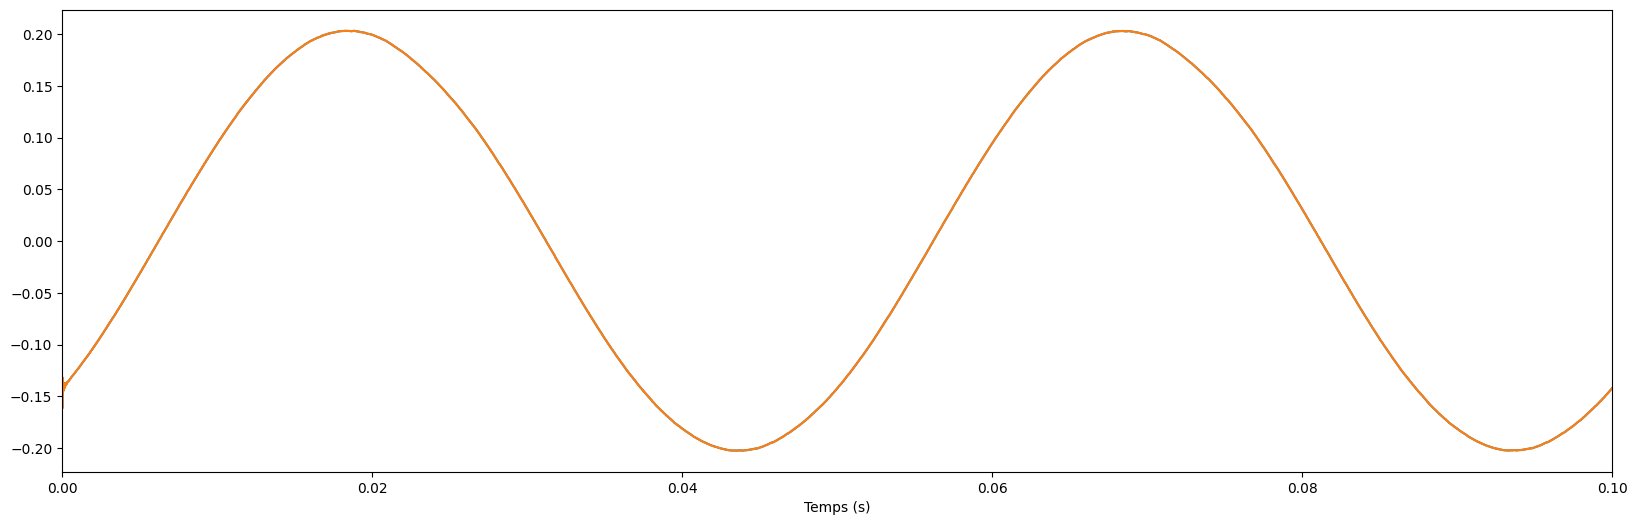

In [44]:
# Enregistre le signal avec la carte son
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

# Crée un vecteur temps pour l'affichage
t_enr = np.arange(0, duration, periode_ech)

# Crée une figure et des axes pour l'affichage
fig, ax = plt.subplots(figsize=(20, 6))

# Affiche le signal enregistré
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.1)
ax.set_xlabel('Temps (s)')

# Compte le nombre de passages à zéro pour déterminer la fréquence reçue
count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1

# Affiche la fréquence reçue
print("La fréquence reçue est : ", count/duration)

# Calcule l'amplitude du signal reçu
val_amplitude = amplitude(enregistrement1)

# Calcule la réponse en fréquence
print("La réponse en fréquence : ", rep_freq(val_amplitude))

# Ajoute la réponse en fréquence à la liste
rep_fr.append(rep_freq(val_amplitude))

# Ajoute la fréquence reçue à la liste
frequencies_r.append(count/duration)

# Affiche les listes de réponses en fréquence et de fréquences reçues
print(rep_fr)
print(frequencies_r)


**CODE D'ENVOIE :**

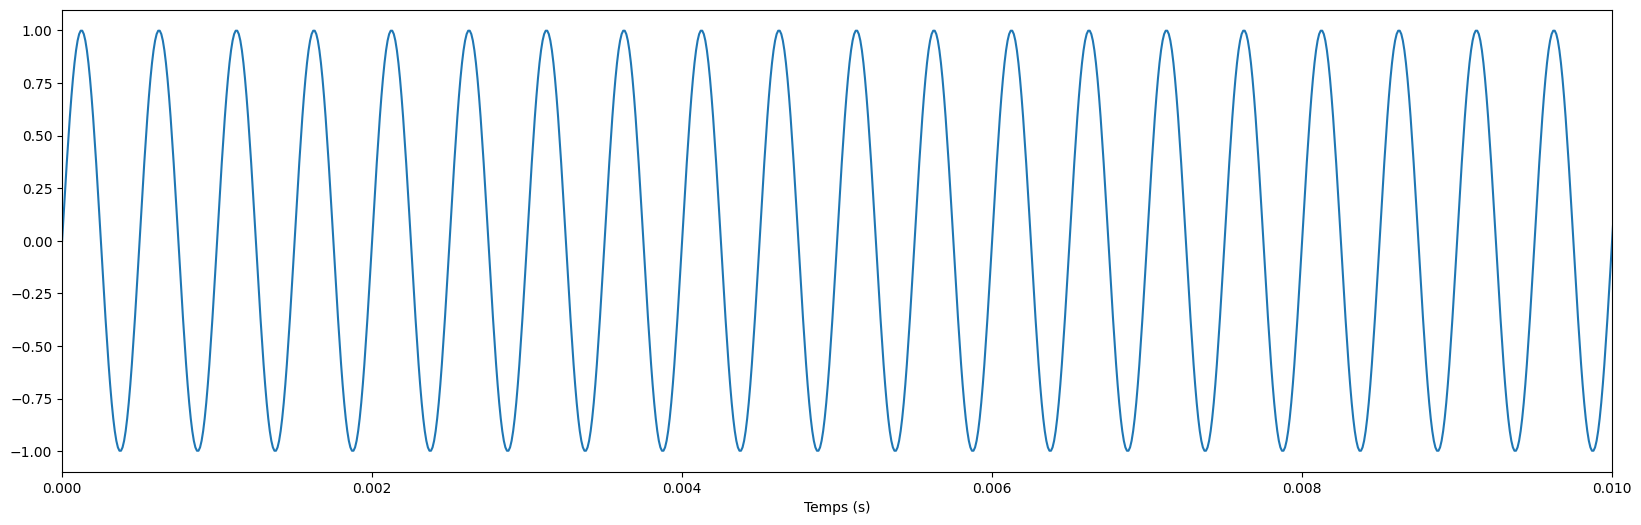

La fréquence envoyée est : 2000
L'amplitude émise est : 1


In [4]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 2000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  1999.0
La réponse en fréquence :  0.999969482421875
[0.203277587890625, 0.999969482421875]
[17.5, 1999.0]


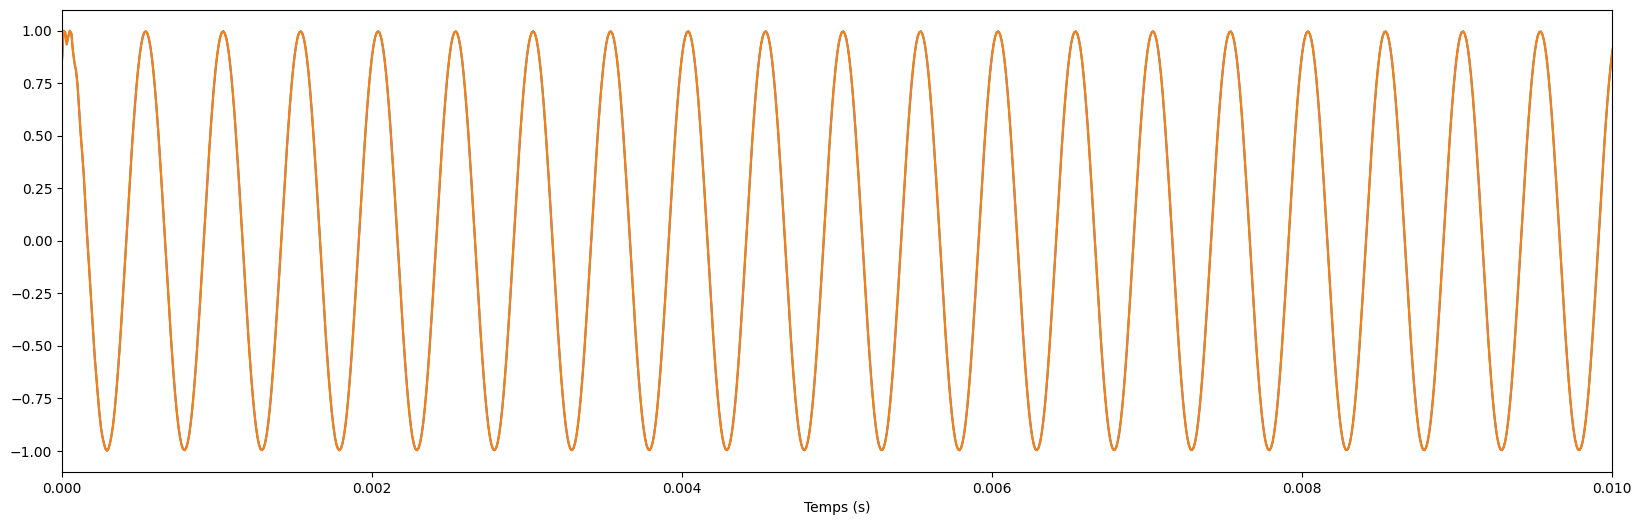

In [45]:
## reçue

enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.01)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude))

rep_fr.append(rep_freq(val_amplitude))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

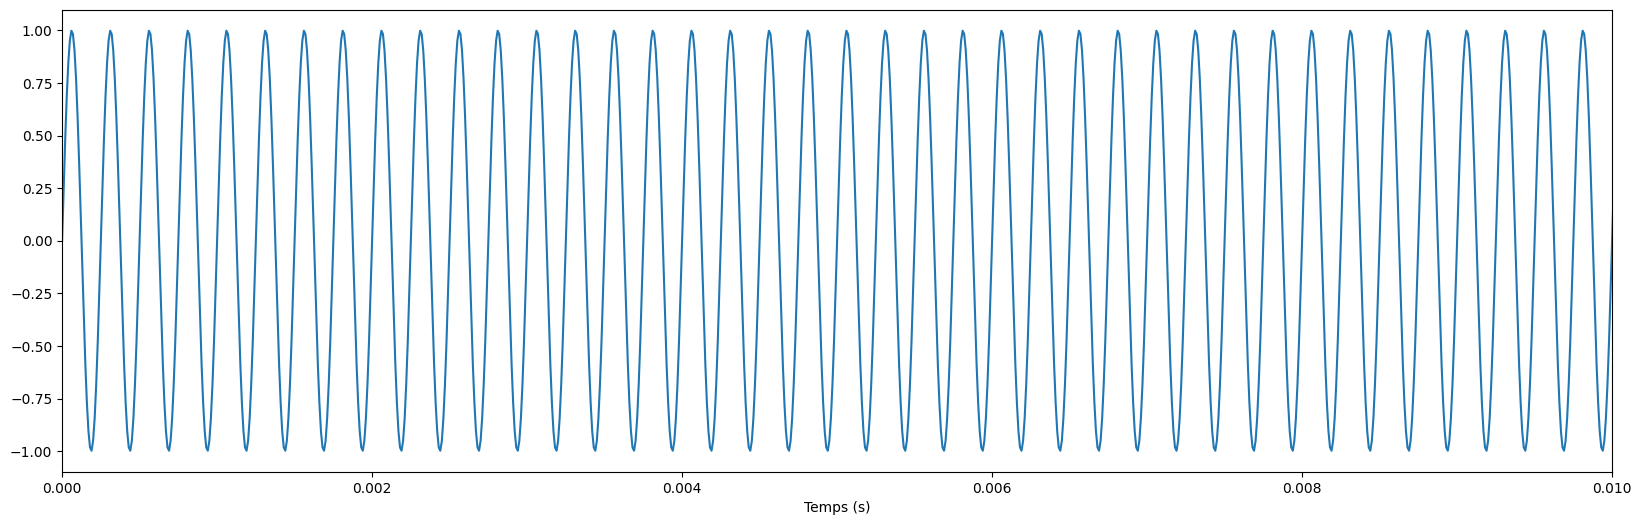

La fréquence envoyée est : 4000
L'amplitude émise est : 1


In [6]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 4000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  3999.0
La réponse en fréquence :  0.999969482421875
[0.203277587890625, 0.999969482421875, 0.999969482421875]
[17.5, 1999.0, 3999.0]


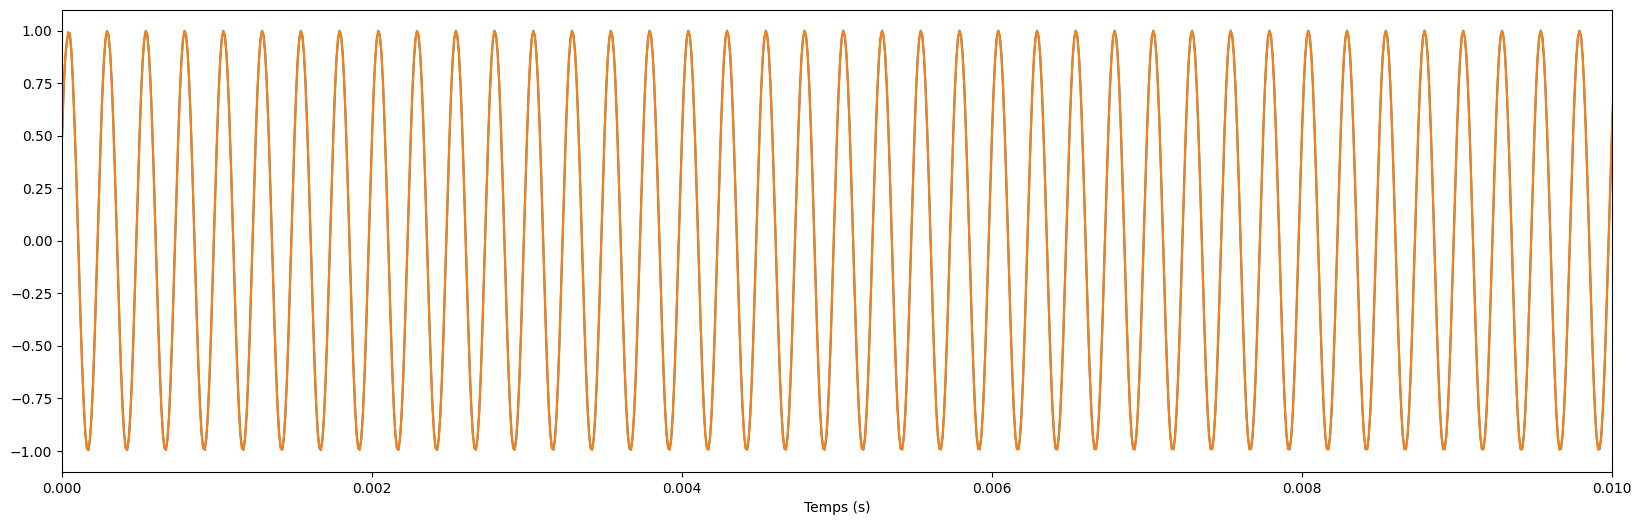

In [46]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.01)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude))

rep_fr.append(rep_freq(val_amplitude))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

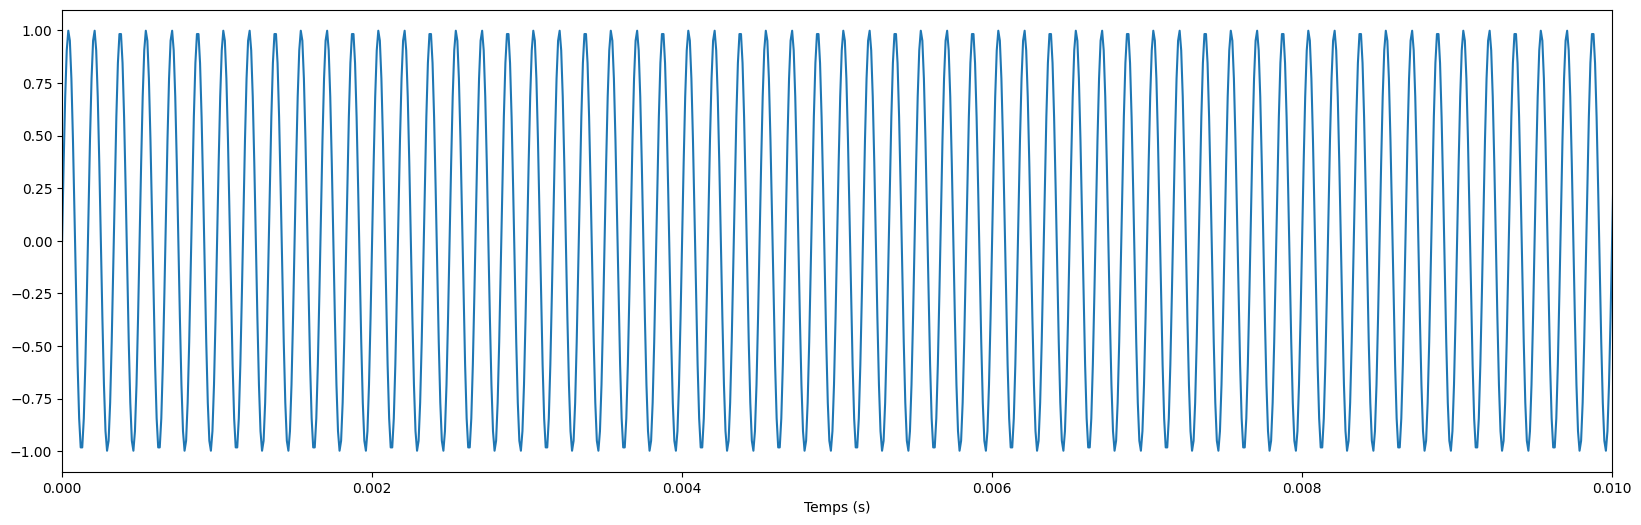

La fréquence envoyée est : 6000
L'amplitude émise est : 1


In [6]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 6000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  6000.5
La réponse en fréquence :  0.999969482421875
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875]
[17.5, 1999.0, 3999.0, 6000.5]


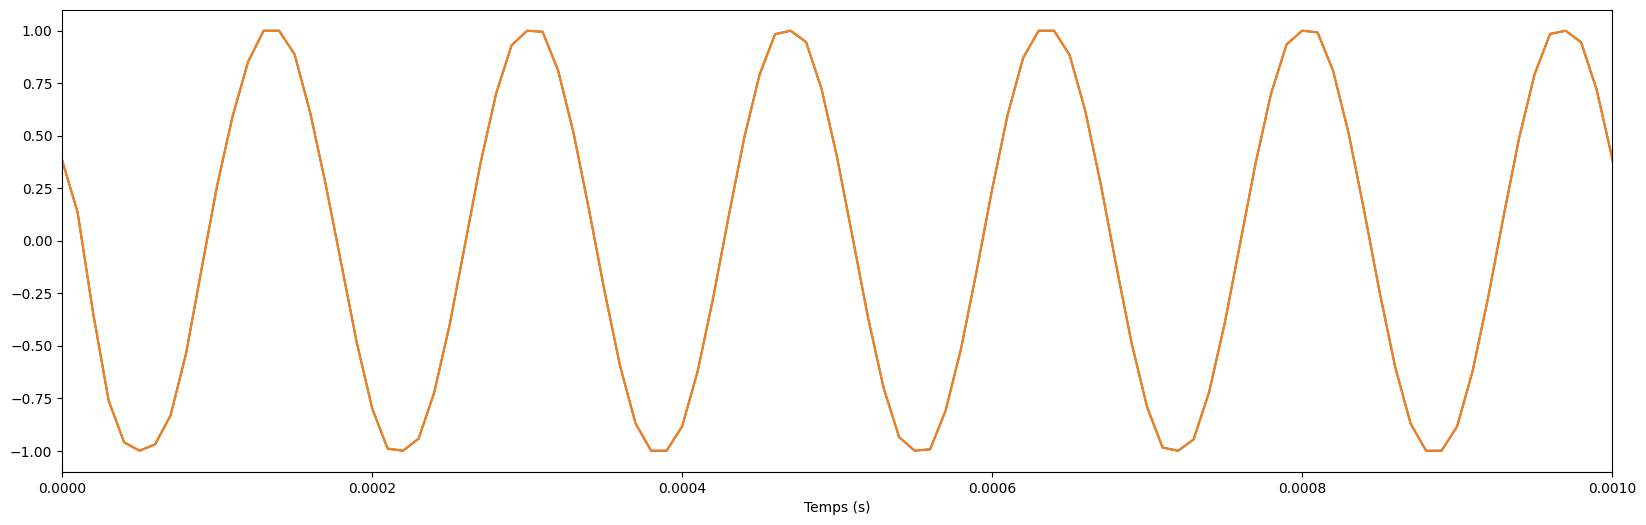

In [47]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude))

rep_fr.append(rep_freq(val_amplitude))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

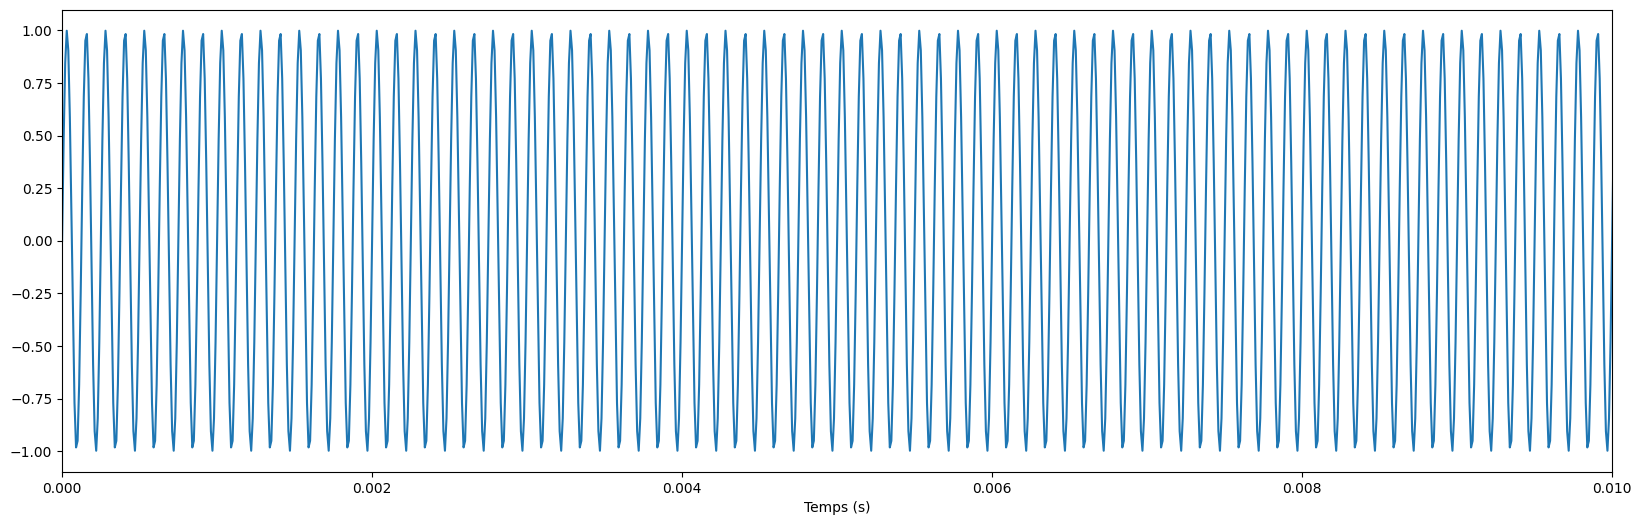

La fréquence envoyée est : 8000
L'amplitude émise est : 1


In [7]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 8000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  8000.0
La réponse en fréquence :  0.999969482421875
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875]
[17.5, 1999.0, 3999.0, 6000.5, 8000.0]


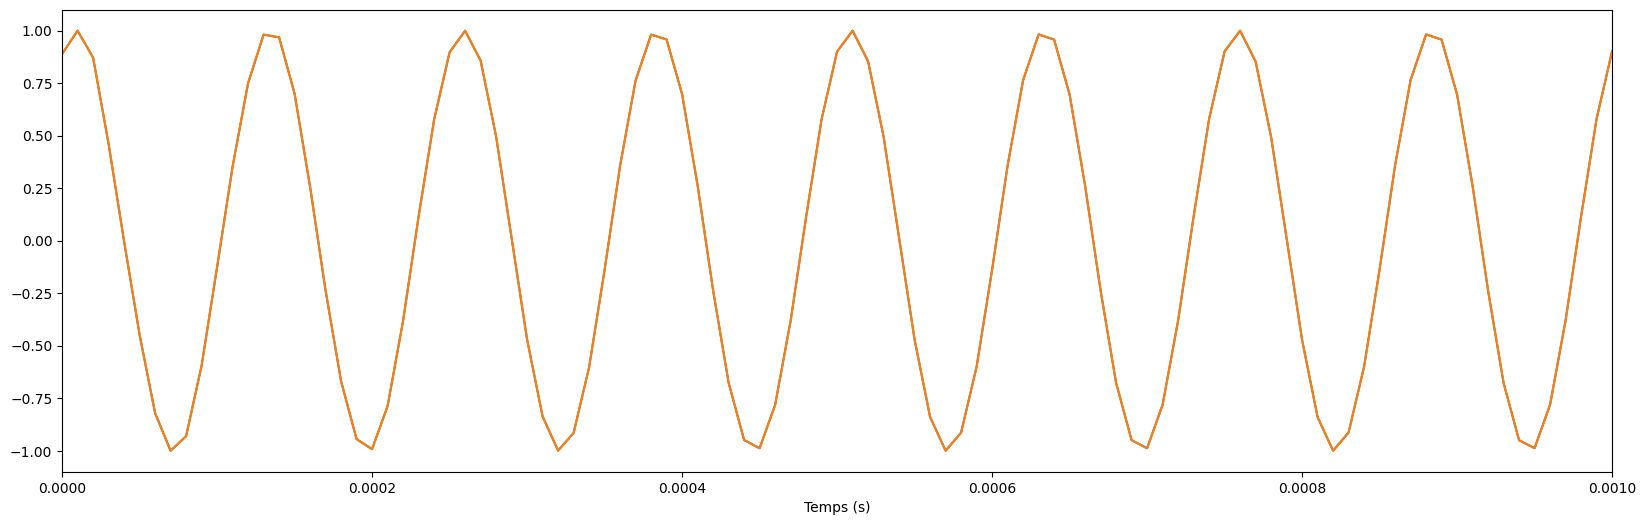

In [48]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude))

rep_fr.append(rep_freq(val_amplitude))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

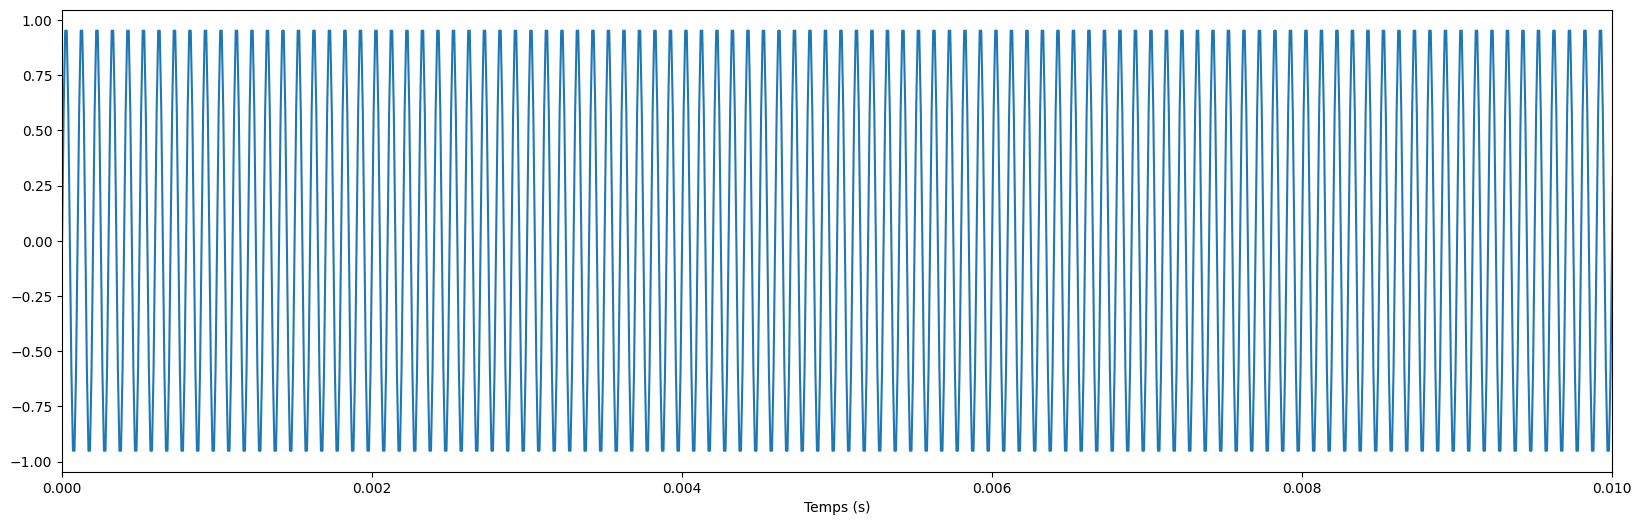

La fréquence envoyée est : 10000
L'amplitude émise est : 1


In [8]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 10000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  9999.5
La réponse en fréquence :  0.999969482421875
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875]
[17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5]


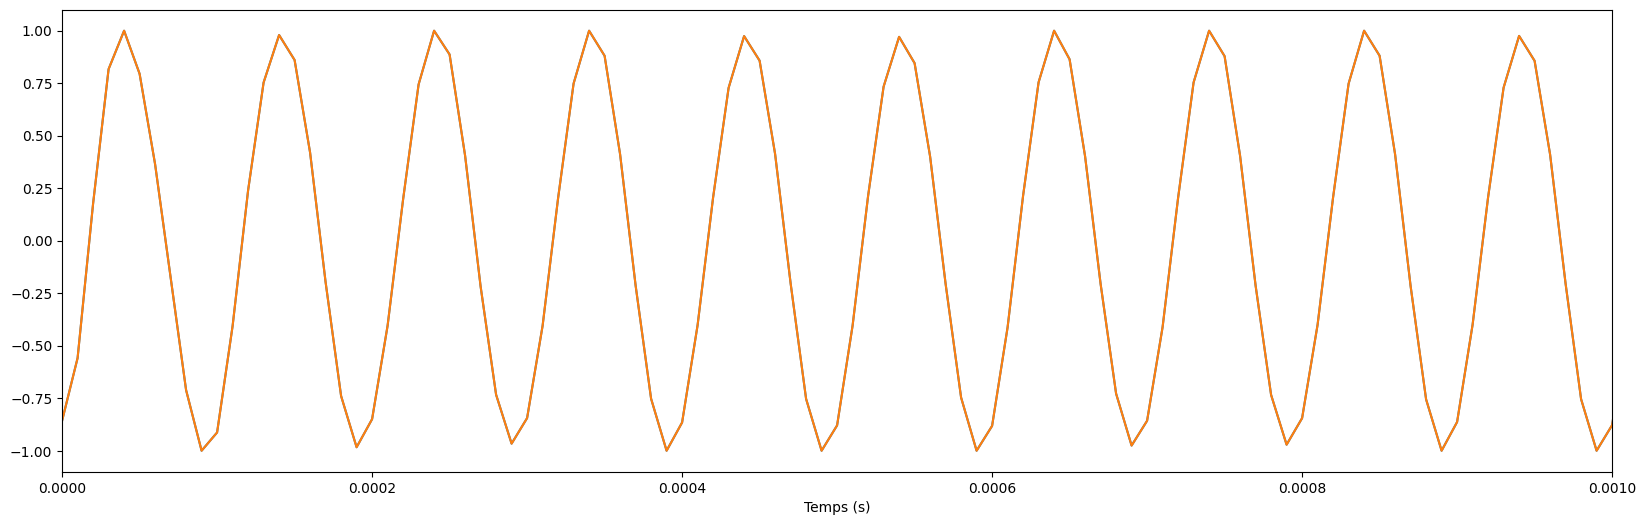

In [49]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude))

rep_fr.append(rep_freq(val_amplitude))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

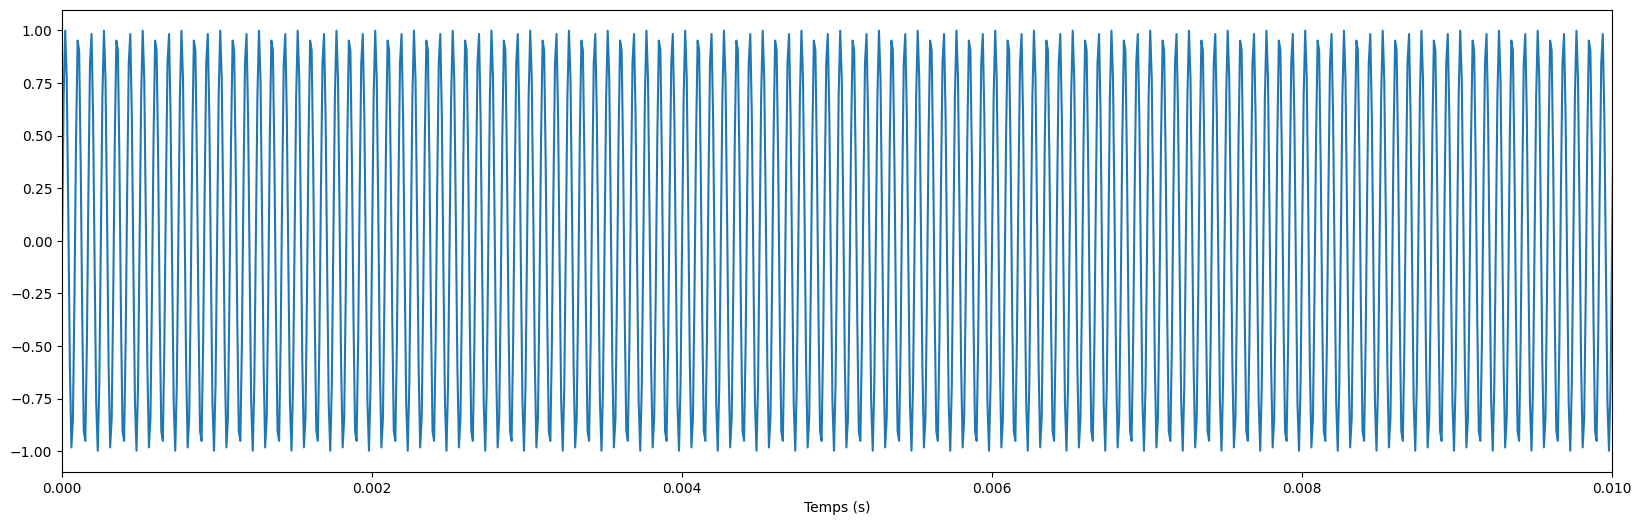

La fréquence envoyée est : 12000
L'amplitude émise est : 1


In [9]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 12000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  12001.0
La réponse en fréquence :  0.999969482421875
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875]
[17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0]


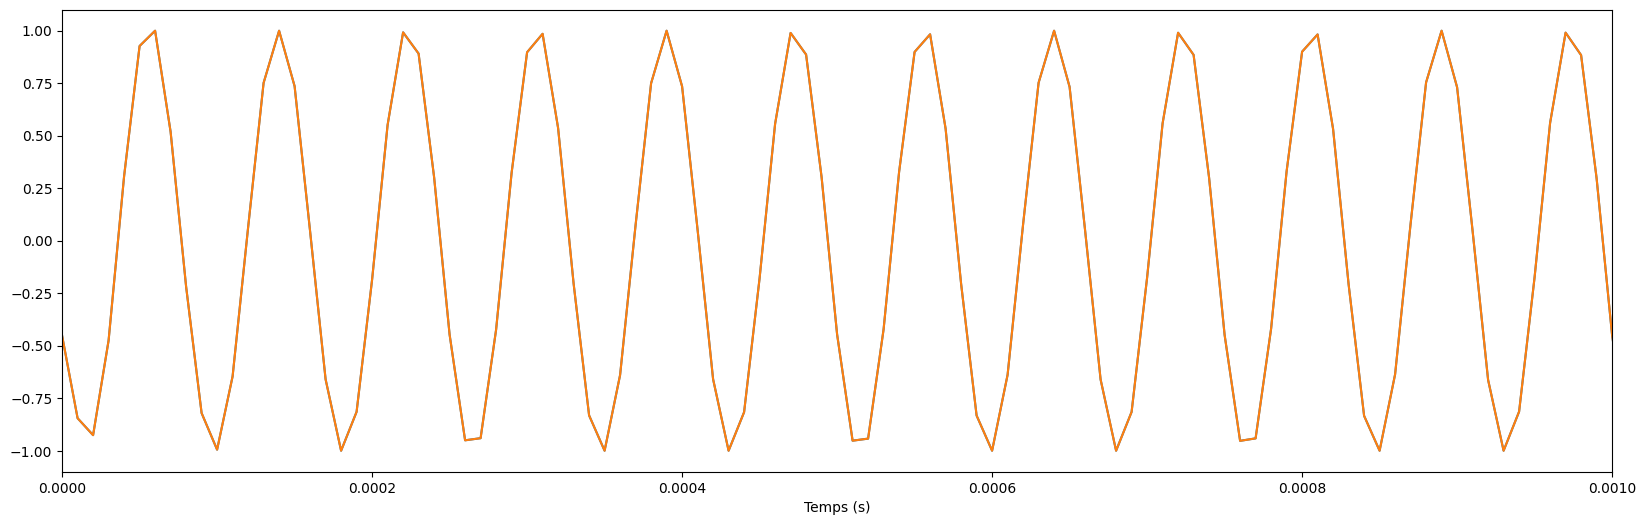

In [50]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude))

rep_fr.append(rep_freq(val_amplitude))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

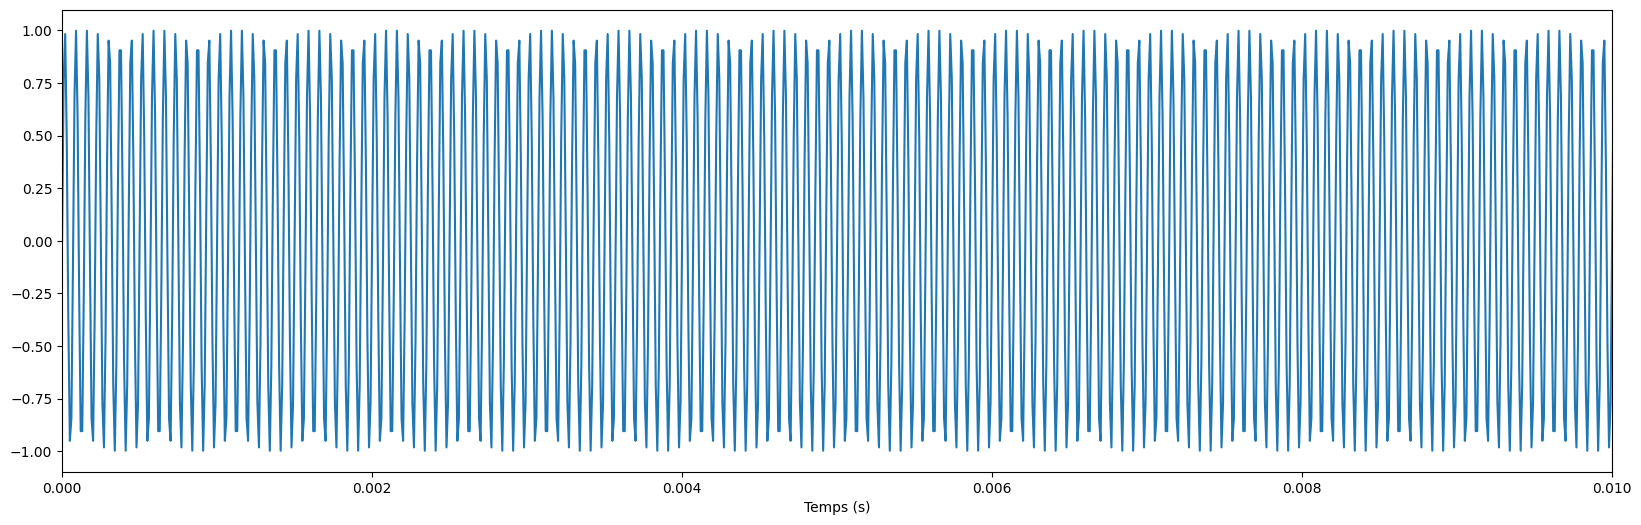

La fréquence envoyée est : 14000
L'amplitude émise est : 1


In [10]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 14000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  14001.0
La réponse en fréquence :  0.9661865234375
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.9661865234375]
[17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0, 14001.0]


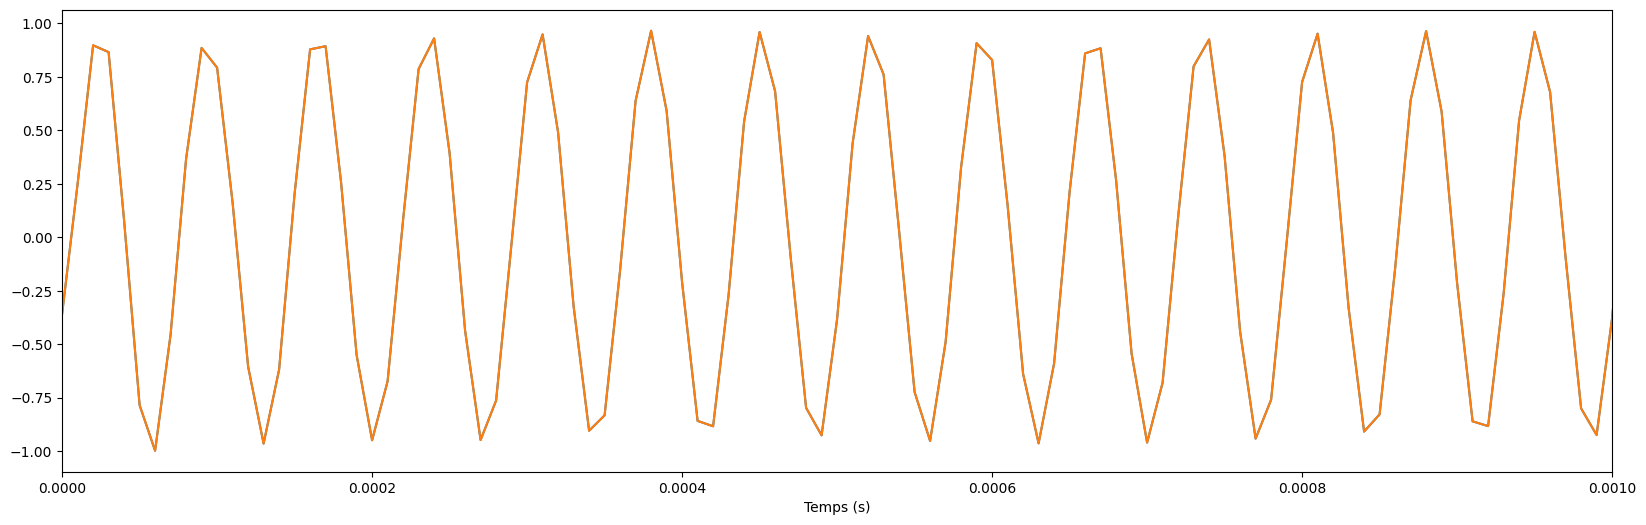

In [51]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude, 1.9960534568625714))

rep_fr.append(rep_freq(val_amplitude, 1.9960534568625714))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

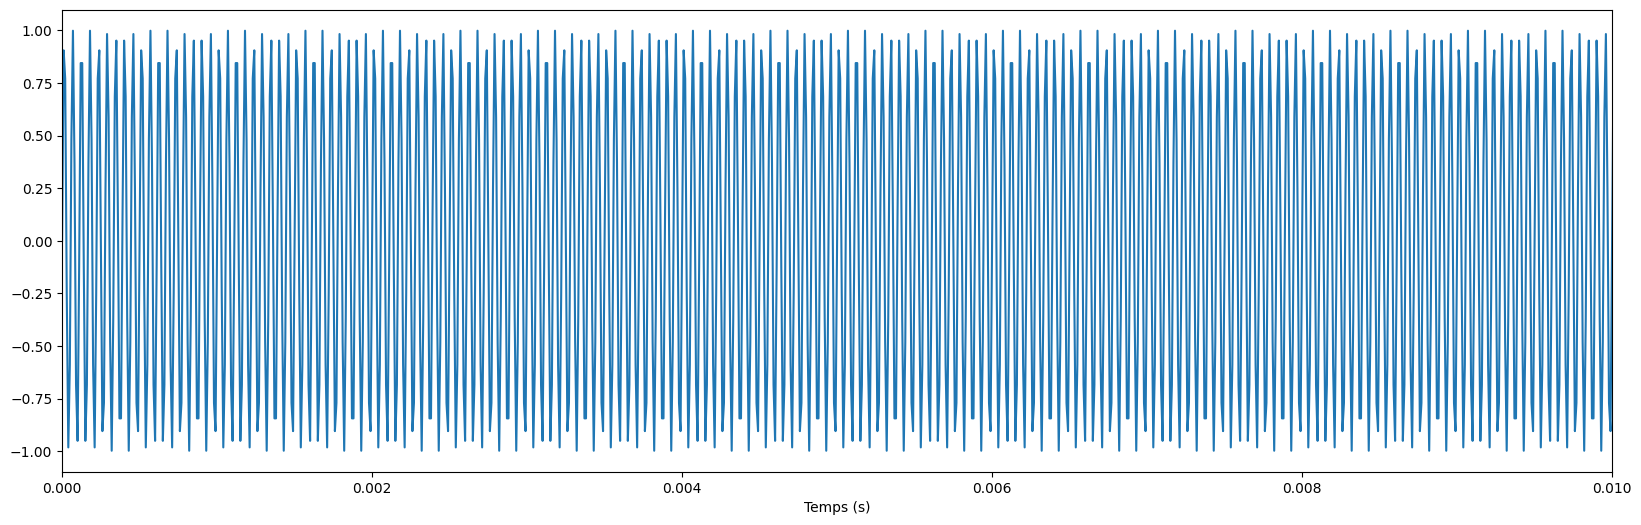

La fréquence envoyée est : 18000
L'amplitude émise est : 1


In [11]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 18000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  18000.0
La réponse en fréquence :  0.87225341796875
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.9661865234375, 0.87225341796875]
[17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0, 14001.0, 18000.0]


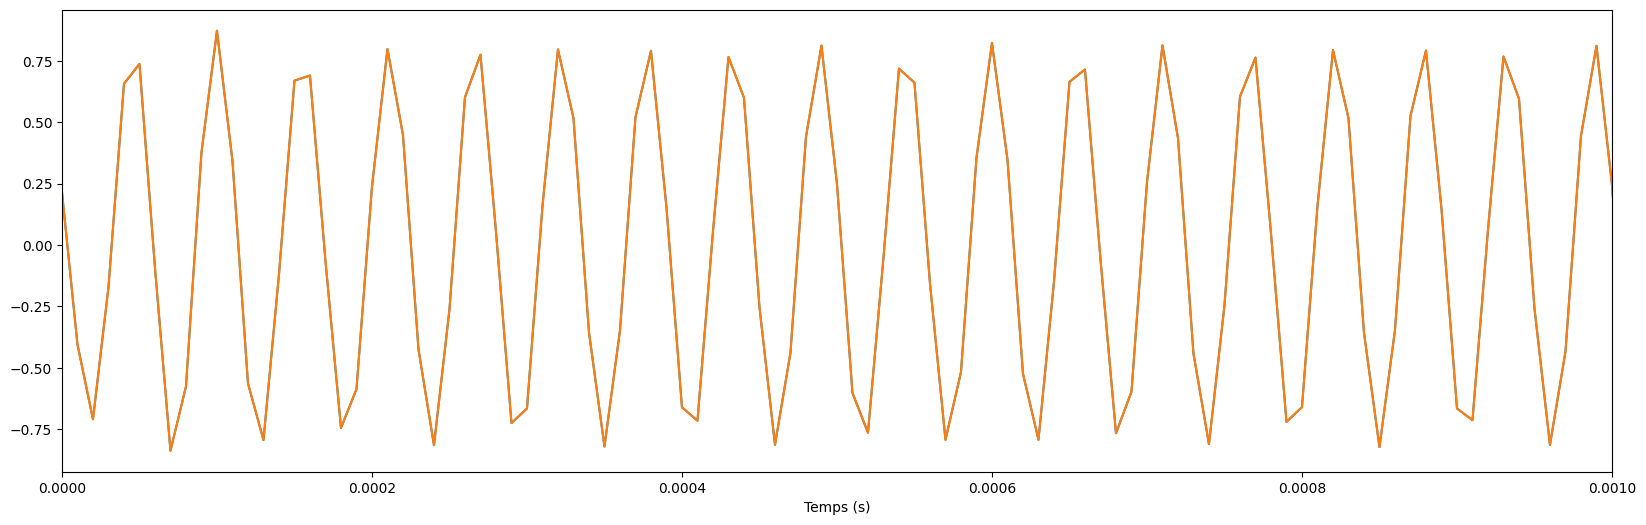

In [52]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude, 1.9960534568668047))

rep_fr.append(rep_freq(val_amplitude, 1.9960534568668047))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

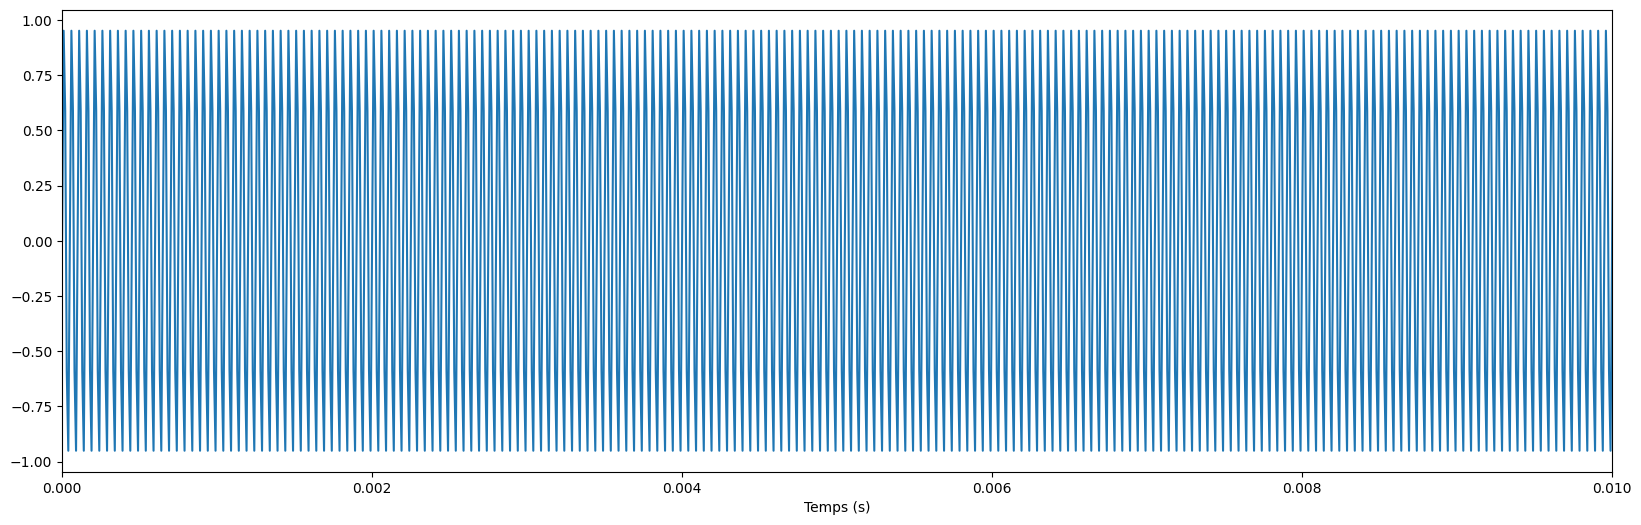

La fréquence envoyée est : 20000
L'amplitude émise est : 1


In [12]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 20000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  20001.0
La réponse en fréquence :  0.59881591796875
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.9661865234375, 0.87225341796875, 0.59881591796875]
[17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0, 14001.0, 18000.0, 20001.0]


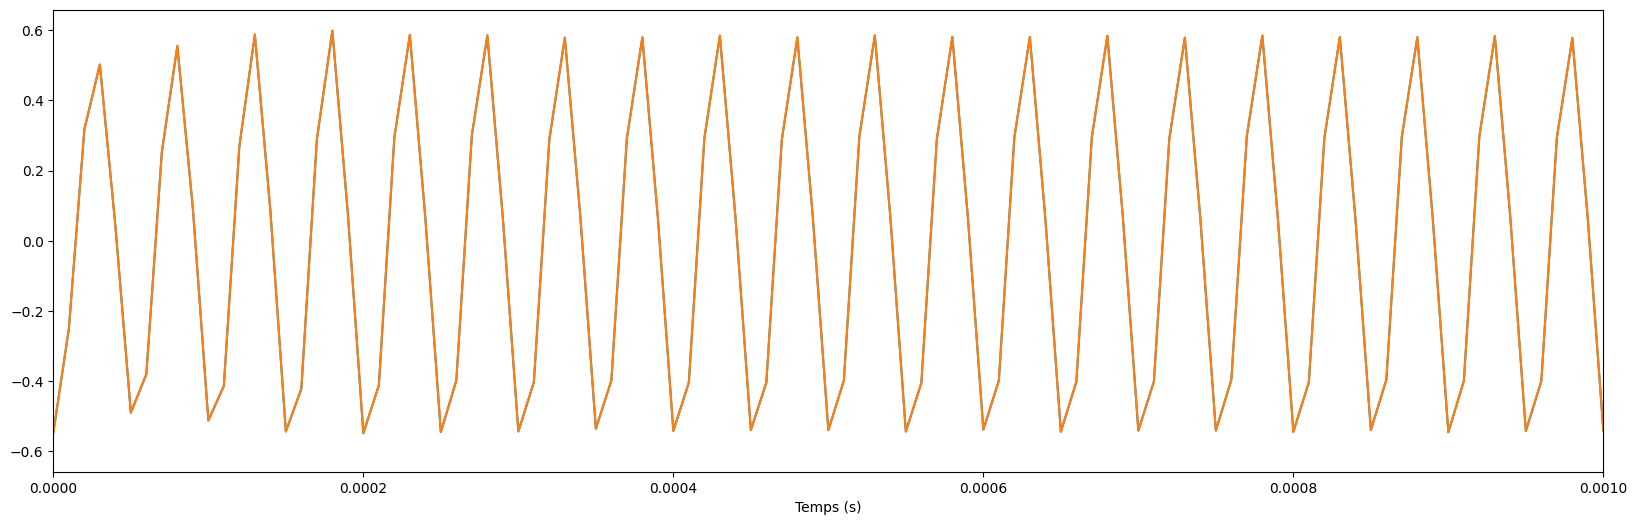

In [53]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude, 1.902113032639755))

rep_fr.append(rep_freq(val_amplitude, 1.902113032639755))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**11.** Tracer le résultat avec le gain en dB et avec une échelle en fréquence linéaire et semi-log (en expliquant l’intérêt de cette dernière) à l’aide de la librairie Matplotlib.


Fréquences reçue [17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0, 14001.0, 18000.0, 20001.0]
 [0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.9661865234375, 0.87225341796875, 0.59881591796875]
[-13.838210026057178, -0.00026507636037961915, -0.00026507636037961915, -0.00026507636037961915, -0.00026507636037961915, -0.00026507636037961915, -0.00026507636037961915, -0.2987804886676164, -1.1871464014363182, -4.454133271652945]


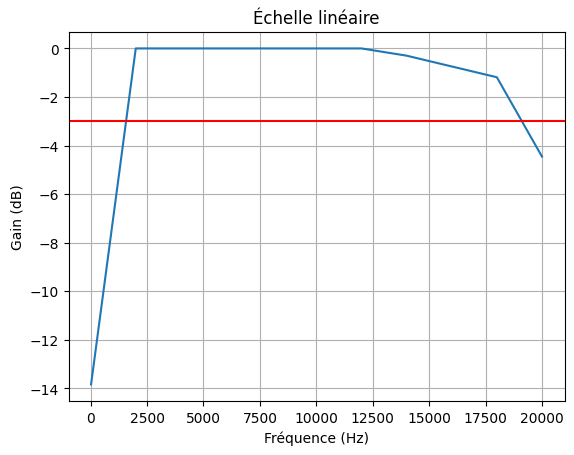

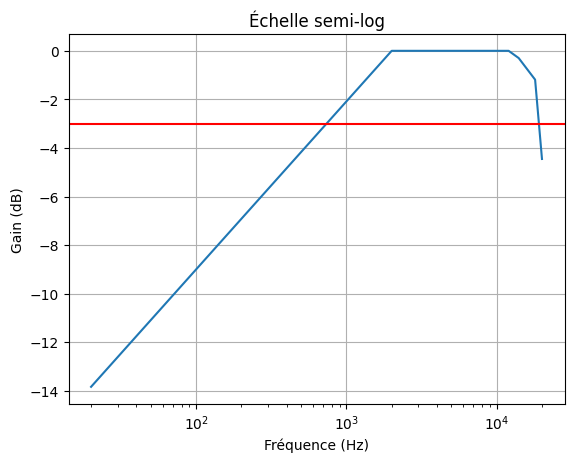

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Créer des données de fréquence et de gain
#frequencies = [0.85, 0.99975, 0.99975, 0.9999166666666667, 0.999875, 0.99995, 0.9999583333333333, 1.0000714285714285, 1.0000833333333334, 1.00005]  # Fréquences de 1 à 1000 Hz
frequencies_e = [20, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 18000, 20000]
frequencies_r = [17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0, 14001.0, 18000.0, 20001.0]
rep_fr = [0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.9661865234375, 0.87225341796875, 0.59881591796875]
print("Fréquences reçue",frequencies_r)
print("",rep_fr)
#frequencies = np.logspace(0, 3, 500)  # Fréquences de 1 à 1000 Hz
lst_gain = []

a = 20 * np.log10(0.203277587890625)

for idex in range(len(rep_fr)):
    lst_gain.append(20 * np.log10(rep_fr[idex]))  # Gain en dB

print(lst_gain)

# Tracer le gain en fonction de la fréquence avec une échelle linéaire
plt.figure()
plt.plot(frequencies_e, lst_gain)
plt.axhline(y=max(lst_gain)-3, color='red')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Échelle linéaire')
plt.grid(True)

plt.figure()
plt.semilogx(frequencies_e, lst_gain)
plt.axhline(y=max(lst_gain)-3, color='red')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Échelle semi-log')
plt.grid(True)

plt.show()

<img src="https://cdn.pixabay.com/photo/2018/01/04/16/53/building-3061124_960_720.png" width=30 align=left><div class="alert alert-block alert-danger">  
**INTERET DU CODE :**
<p>Ce code Python a pour but de créer des graphiques représentant la réponse en fréquence d'un système.</p>

1. Importation des bibliothèques nécessaires (`matplotlib.pyplot` et `numpy`).
2. Définition des fréquences émises (`frequencies_e`), des fréquences reçues (`frequencies_r`), et de la réponse en fréquence (`rep_fr`) du système.
3. Calcul du gain en décibels (`lst_gain`) à partir de la réponse en fréquence.
4. Tracé d'un premier graphique avec une échelle linéaire, représentant la réponse en fréquence (`rep_fr`) en fonction des fréquences émises (`frequencies_e`).
5. Tracé d'un deuxième graphique avec une échelle semi-logarithmique (`semilogx`), représentant le gain en fonction des fréquences émises.
6. Affichage des graphiques.

L'interet de ce code permet de generer des graphiques permettent de visualiser la réponse en fréquence du système en **Gain (dB)** et en **Fréquence (Hz)**, montrant comment le gain varie en fonction de la fréquence. Le premier graphique utilise une échelle linéaire pour les deux axes, tandis que le deuxième graphique utilise une échelle semi-logarithmique sur l'axe des fréquences pour mieux visualiser les variations sur une large plage de fréquences.


**12.** Trouver sur Internet la définition de la fréquence à -3dB et préciser la ou les fréquences de coupure pour ce système.

**La définition de la fréquence -3dB est la suivante :**

La fréquence -3dB est la fréquence à laquelle la puissance d'un signal est inférieure de 3 décibels (dB) à sa puissance maximale.



<h3 align="center">JOUR 2 & 3 - MERCREDI & JEUDI</h3>
<h3 align="center">L’automatisation de la mesure de la réponse en fréquence.</h3>

**RECEPTION :**

In [3]:
import time
import matplotlib.pyplot as plt

def reception(enreg):
    duration = 3
    frequence_ech = 100000

    t = 0.5
    a = 0

    time.sleep(t)

    while a == 0:
        enregistrement.append(enreg)
        a += 1

    if (enreg[idex][1] < 0) and (enreg[idex+1][1] > 0):
        count += 1

    print("La fréquence reçue est :", frequence_recue)
    print("L'amplitude du signal reçu est :", amplitude_value)
    print("La réponse en fréquence est :", rep_freq_value)

    plt.plot(frequencies_e, lst_gain)
    plt.axhline(y=max(lst_gain)-3, color='red')
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('Gain (dB)')
    plt.title('Échelle linéaire')
    plt.grid(True)

reception()

NameError: name 'enreq' is not defined

In [10]:
import time
import matplotlib.pyplot as plt
import numpy as np

duration = 3
frequence_ech = 100000

def reception(signal):
    enregistrementauto = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
    sd.wait()
    frequence_recue = detecter(signal)    
    print("La fréquence émise est :", frequence_recue)

def detecter(signal):
    temps = np.arange(0, len(signal), 1)
    amplitude = np.argmax(np.abs(signal))
    frequence_recue = 1 / (temps[amplitude] - temps[amplitude - 1])
    return abs(frequence_recue)

print("La fréquence reçue est :", frequence_recue)
print("L'amplitude du signal reçu est :", amplitude_value)
print("La réponse en fréquence est :", rep_freq_value)

plt.plot(frequencies_e, lst_gain)
plt.axhline(y=max(lst_gain)-3, color='red')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Échelle linéaire')
plt.grid(True)

reception()

NameError: name 'frequence_recue' is not defined

**EMISSION :**

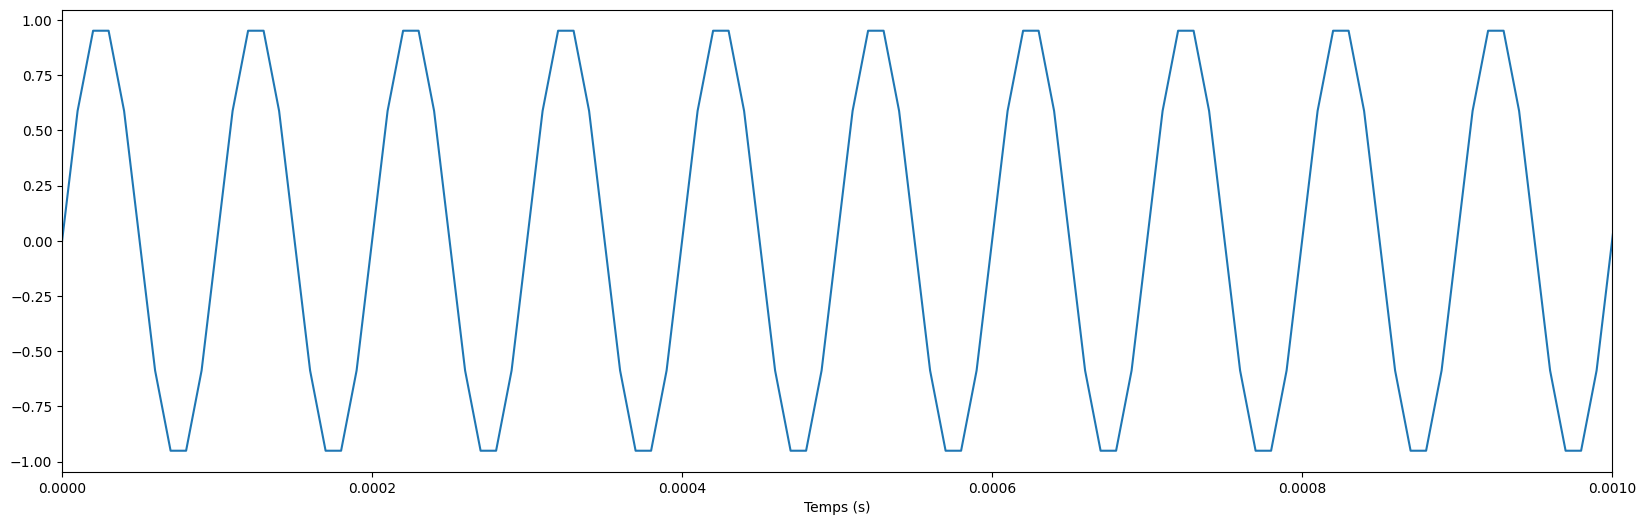

La fréquence envoyée est : 10000
L'amplitude émise est :  1.902113032685218


In [41]:
def emission():
    frequency(10000, debut=0, fin=10, precision=0.001)
    
emission()